# Support Vector Machines and Random Forest 

In [33]:
# Today we use the support vector machine and the random forest classifier to make predictions for some data
# This practical only contains a tiny amount of lines of code provided by you.
# We will use sklearn library to make everything work.
# Go through every notebook cell and implement the code on the areas where code is missing.
# Data generation and plotting is already provided as methods below.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [35]:
def create_dataset1():
    X,y = make_blobs(n_samples = 90, centers = 2, random_state = 3)
    return X, y

In [36]:
def create_dataset2():
    # Create dataset
    np.random.seed(42)  # always the same data generation
    X = np.stack((np.random.normal(size=100),np.random.normal(size=100)),axis = 1)
    y = np.array([1 if (xy[0]**2+xy[1]**2)**0.5 <0.5 else 0 for xy in X])
    
    return X, y

In [37]:
def plot_dataset(X, y):
    # plot data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '*', s=30)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'v', s=30)
    plt.show()

## 1) Support Vector Machines

In [38]:
def plot_svm_vectors(clf):
    plt.figure(figsize=(10,10))

    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '*', s=30)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'v', s=30)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors='none',
        edgecolors="k",
    )
    plt.title("Distance to hyperplane and support vectors")
    plt.ylabel('Feature y')
    plt.xlabel('Feature x')
    plt.show()

### 1.1) Use a linear kernel

In [39]:
# Use sklearn and its svm implementation to fit the data into the model

# your support vector machine from sklearn - code here
clf = svm.SVC(kernel="linear")


#### 1.1.1) Dataset 1

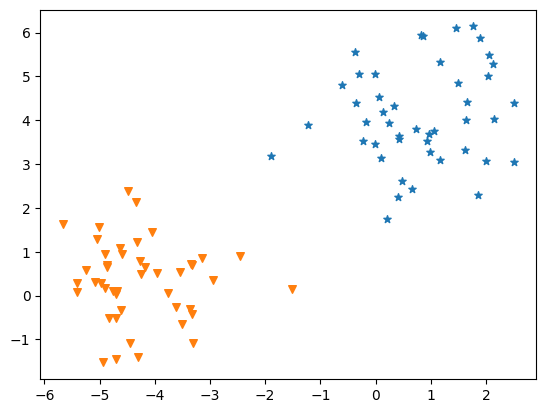

In [40]:
X, y = create_dataset1()
plot_dataset(X, y)

In [41]:
# use your SVM (fit method) from above with dataset 1 - write code here!


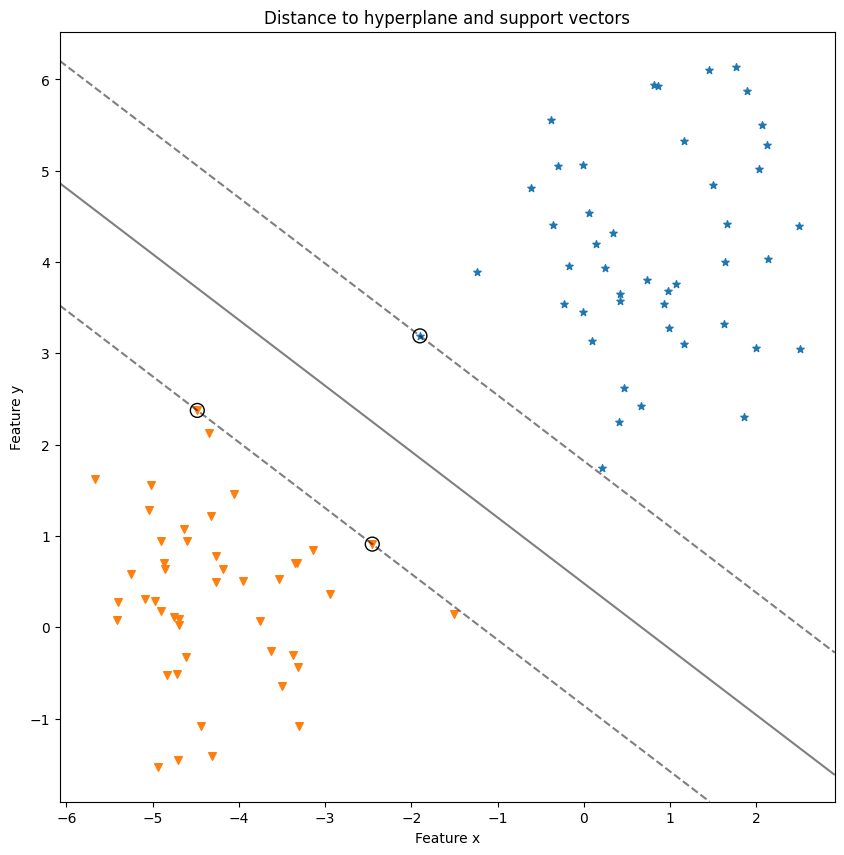

In [42]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?
clf.fit(X, y)
plot_svm_vectors(clf)

#### 1.1.2) Dataset 2

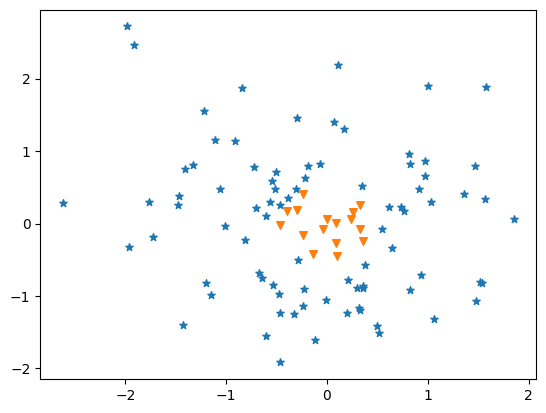

In [43]:
X, y = create_dataset2()
plot_dataset(X, y)

In [44]:
# use your SVM (fit method) from above with dataset 2 - write code here!
clf2 = svm.SVC(kernel="linear")


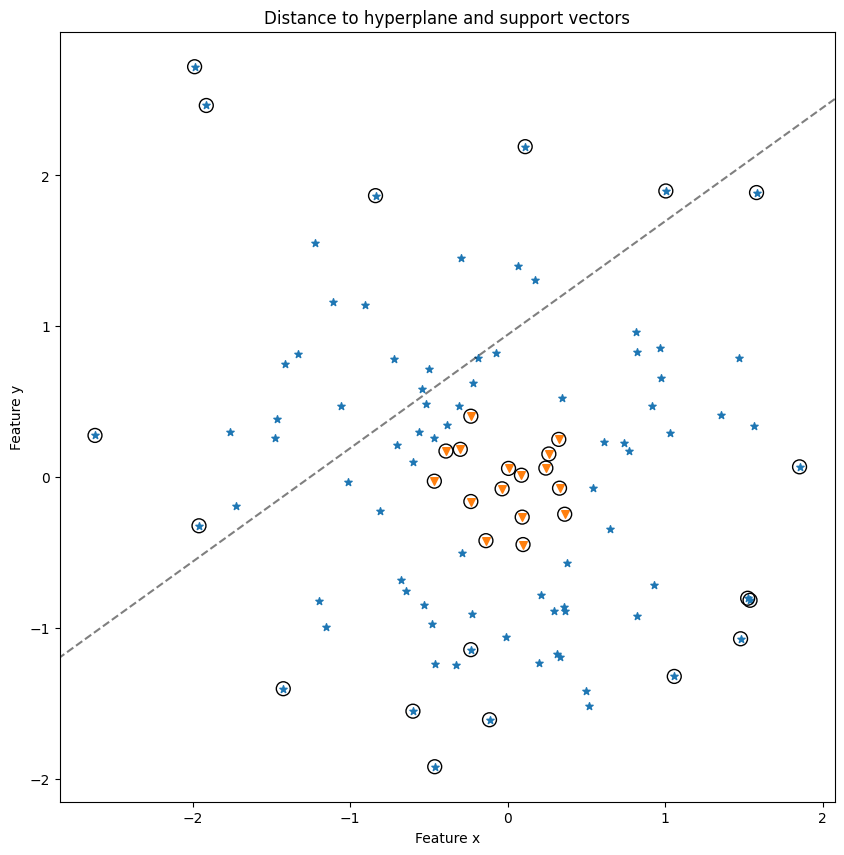

In [45]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?
clf2.fit(X,y)
plot_svm_vectors(clf2)

### 1.2) Use a polynomial kernel

In [46]:
# polynomial kernel (update code below)
# what is an appropriate value of C?
clf = svm.SVC(kernel="poly",C=50)

#### 1.2.1) Dataset 1

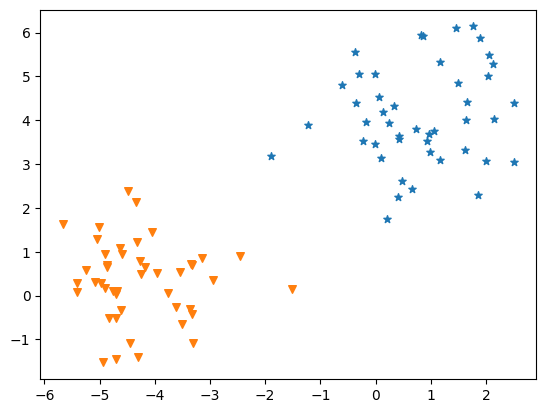

In [47]:
X, y = create_dataset1()
plot_dataset(X, y)

In [48]:
# use your SVM (fit method) from above with dataset 1 - write code here!
clf.fit(X, y)


SVC(C=50, kernel='poly')

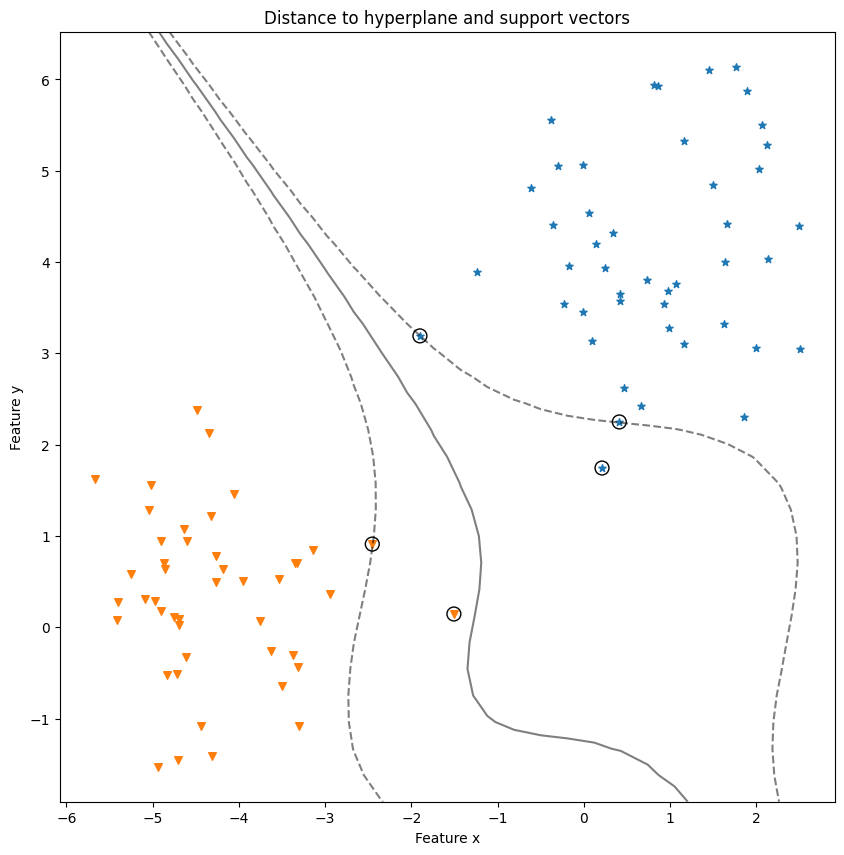

In [49]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

plot_svm_vectors(clf)

#### 1.2.2) Dataset 2

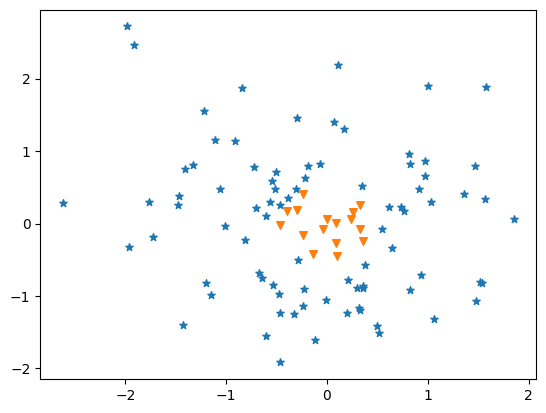

In [50]:
X, y = create_dataset2()
plot_dataset(X, y)

In [51]:
# use your SVM (fit method) from above with dataset 1 - write code here!

clf.fit(X, y)

SVC(C=50, kernel='poly')

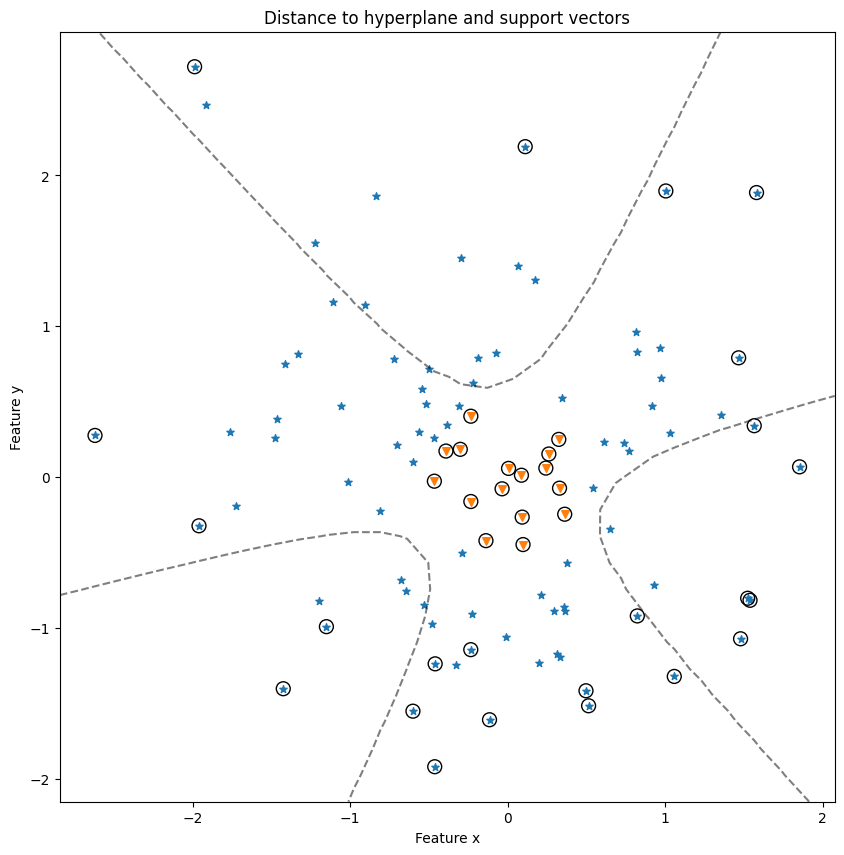

In [52]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

plot_svm_vectors(clf)

## 2) Random Forest Classification

In [53]:
def calculate_accuracy(y, y_pred):
    res = y == y_pred
    
    return np.mean(res)

In [54]:
# Use sklearn and its RandomForestClassifier implementation to fit the data into the model

# your RandomForestClassifier from sklearn - code here
# Start from a low number of estimators before you increase it step by step to see the prediction accuracy differences
clf = RandomForestClassifier()

### 2.1) Dataset 1

[[ 0.97213988  3.68573842]
 [-5.01614507  1.56154456]
 [-4.63916601  1.07583611]
 [ 1.99832549  3.06188882]
 [-4.17946106  0.64118782]
 [ 0.21219196  1.74387328]
 [ 0.09216603  3.13908069]
 [ 0.42487931  3.64653908]
 [-4.70716987 -1.45908253]
 [-1.23229972  3.89519459]
 [-0.16908848  3.95730655]
 [ 1.76101432  6.13906724]
 [-5.66856329  1.62517906]
 [ 2.13993601  4.03104222]
 [-3.62319202 -0.26181256]
 [-3.53684324  0.52961248]
 [-3.50283362 -0.63888506]
 [-5.40280714  0.27616754]
 [ 0.81854337  5.93760148]
 [-4.69303421  0.0937087 ]
 [-4.34999532  2.12582891]
 [ 1.16102127  5.33083874]
 [ 0.99185358  3.27429903]
 [-5.41754185  0.07576566]
 [ 1.06599169  3.75827904]
 [ 2.50210641  4.39967272]
 [-2.94843418  0.3655385 ]
 [-4.4821113   2.37470145]
 [-3.36709068 -0.30343965]
 [-3.33038627  0.70280143]
 [-1.50579275  0.14533308]
 [ 2.06410556  5.49669427]
 [-4.9073387   0.18160872]
 [ 1.4997464   4.83917285]
 [-3.31907313 -0.43187992]
 [-4.25934618  0.4926206 ]
 [ 2.12414555  5.28234711]
 

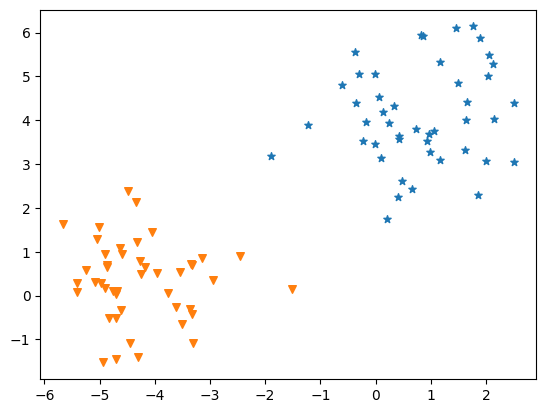

In [64]:
X, y = create_dataset1()

plot_dataset(X, y)

In [56]:
# We split the data into training and test data first
# dataset split into 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [57]:
# use your classifier (fit method) with dataset 1 (train)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [58]:
# predict the values with the test dataset of dataset 1
# calculate the accuracy (use the method "calculate_accuracy" from above)

y_pred = clf.predict(X_test)
calculate_accuracy(y_test, y_pred)

1.0

### 2.2) Dataset 2

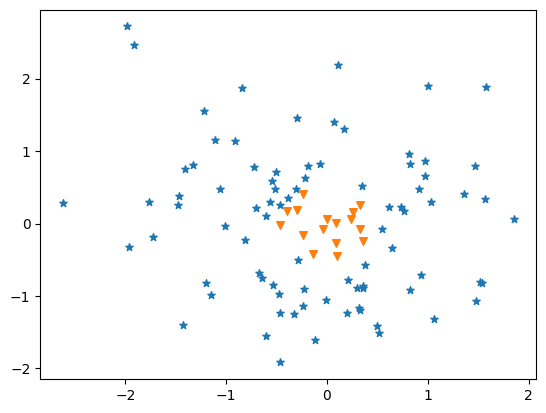

In [59]:
X, y = create_dataset2()
plot_dataset(X, y)

In [60]:
# We split the data into training and test data first
# dataset split into 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [61]:
# use your classifier (fit method) with dataset 1 (train)
clf.fit(X_train, y_train)


In [63]:
# predict the values with the test dataset of dataset 1
# calculate the accuracy (use the method "calculate_accuracy" from above)
# your code here!

y_pred = clf.predict(X_test)
calculate_accuracy(y_test, y_pred)

0.45